In [4]:
# https://machinelearningstories.blogspot.com/2018/12/easiest-way-of-detection-abnormality.html

# loading required packages
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [34]:
# taking dummy temp and current values, temp should always be in proportion to electric current
Device_temprature= np.array([2,4,6,8,10,12,15,16,18,20])
input_current_in_device= np.array([1,2,3,4,5,6,7,8,9, 10])

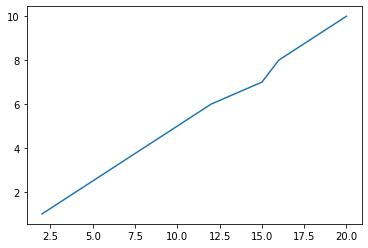

In [35]:
plt.plot(Device_temprature, input_current_in_device) # we see expected relation

In [23]:
model= linear_model.LinearRegression() # buiklding a linear model, it can be a non linear also
X_reshaped= np.reshape(Device_temprature, (-1,1))
model.fit(X_reshaped, input_current_in_device)

In [71]:
runtime_temp=np.array([20,26,28,32,34,35,28,29,35])   # taking temp and current data at run time, when we need to detect anomaly
runtime_electric_current= np.array([10,11,9,11,12,12,11,12,13])

In [67]:
predicted_temp= model.predict(runtime_electric_current.reshape(-1, 1))

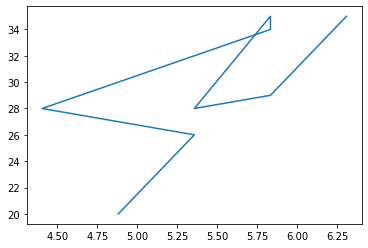

In [68]:
plt.plot(predicted_temp, runtime_temp)  # error in predicted temp and actual temp is severity of abnomality. In plot below
#ideally this should be straing line

In [ ]:
#https://machinelearningstories.blogspot.com/2018/12/easiest-way-of-detection-abnormality.html

##################################  example 2 ##############################################################



In [89]:
# Easiest and most effective way of detection abnormality/ outlier in time-series data
# We have read many blogs on various anomaly detection algorithms. Many a times, we don't need any algorithm to detect abnormality in a system.  

# Different machine learning approaches to detect abnormality in system .

# data scientists are using muti-angle PCA to auto-encoders to detect abnormality in a time series data. There are other complex techniques like ABOD ;used in high dimensional data and CBOF ; used when density based algorithms fail. These techniques are effective only if you know the properties of expected abnormality in system.

# The most effective approach as mentioned in Anomaly detection approaches , is building an expected rule from the variables involved and any deviation form this rule is indication of abnormality in time series. One can use auto encoder , PCA or regression to build such rules. We are using regression so that audience understand the concept and don't get bogged down by related algorithms.


# We can take any home appliance for example like Electric Fan. Let's say we know the temperature of fan's motor and current going into it.

from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


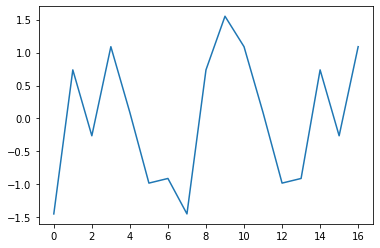

In [86]:
# take data values from normal running scenario, hopefully there is no issue in motor now. Generally this is the time when fan is just installed -

# creating a dummy data
data = [[352,88],[350,90],[350,89],[400,95],[400,94], [390,92], [400,93], [352,88],[350,90],[352,91],[400,95],[400,94], [390,92], [400,93],[350,90],[350,89],[400,95]]

df = pd.DataFrame(data,columns=['Current','Temp'],dtype=float)

# taking independent ( current)  and dependent variable ( temperature)  for relation ( to build using regression )
X= df['Current']
X1= X.values.reshape(X.size,1)
Y= df['Temp']
Y1 = Y.values.reshape(Y.size,1)

# fitting the regression model
regr = linear_model.LinearRegression()
regr.fit(X1, Y1)
predictions =regr.predict(X1)

# plotting error and analyzing  it
error =Y1- predictions
plt.plot(error)



# plot shows that values are lying randomly between y=0 and error is in between +- 1.5. Seems a good fit. Thus we get a relation between current and temperature of motor. If we know the actual current, we can predict temperature with some accuracy. Now the concept is - 'if actual temp is far more than what it should be ( predicted from current values), then there might be some thermal abnormality in the motor. Lets extend our example further-


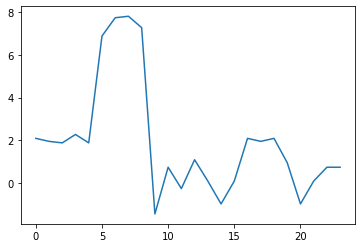

In [87]:



# Taking run time data( run time values of current and temperature) from fan now;

test_X= np.array([400,380,370,355, 370,370,350, 360, 355,352,350,350,400,400,390,400,400,380,400,380,390,400,350,350])
test_Y= np.array([96,94,93, 92, 93,98,97, 98,97,88,90,89,95,94,92,94,96,94,96,93,92,94,90,90])

# predicting temperature for the present values of current ( at run time)
test_X1= test_X.reshape(test_X.size,1)
test_Y1 = test_Y.reshape(test_Y.size,1)
run_time_predictions =regr.predict(test_X1)

# plotting the errors
plt.plot(test_Y1- run_time_predictions)



#Error seems high for few minutes ( between 5 to 9) . Lets combine both test and train error values.-


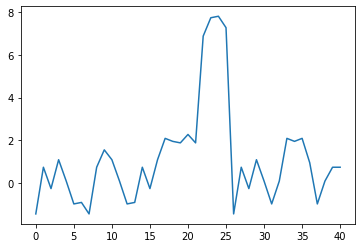

In [88]:

# combining train and test errors to include longer period of time in analysis
X_values= np.concatenate((X1, test_X1), axis=0)
Y_values= np.concatenate((Y1, test_Y1))
prections_values= np.concatenate((predictions,run_time_predictions))
Error_values= Y_values- prections_values
plt.plot(Error_values)



# Y values( errors) near x=20, shows that temperature is far more that expected for specific amount of current flow. This has to be investigated further. ( coolant might not be working, spark is happening etc) . After 23-24, motor is running fine again as error is randomly distributed along y=0.

# Thus at run time high error ( positive, ie. actual more than expected) is an indicator of abnormal system. I don't know how it came like somebody is showing middle finger, but exactly the middle finger is abnormal here. haha!!

In [ ]:
#https://machinelearningstories.blogspot.com/2018/12/easiest-way-of-detection-abnormality.html